# STRAY- SEARCH FOR EXO-PLANETS

This note-book includes a practical example of dealing with a highly unbalanced dataset. 
Its taken from Kaggel's repository, proveded by NASA's Kepler Mission project.Its a time series data set of flux intensities of various stars to classify whether they have an exo-planet around them or not.















# General Analysis

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131331 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

In [ ]:
exoTest = pd.read_csv('drive/exoTest.csv')

FileNotFoundError: ignored

In [ ]:
exoTrain.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
col = exoTrain.columns

print(col)

Index(['LABEL', 'FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6',
       'FLUX.7', 'FLUX.8', 'FLUX.9',
       ...
       'FLUX.3188', 'FLUX.3189', 'FLUX.3190', 'FLUX.3191', 'FLUX.3192',
       'FLUX.3193', 'FLUX.3194', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197'],
      dtype='object', length=3198)


In [ ]:
y = exoTrain.LABEL #defining y as the label. i.e. as either the vakue 1 or the value 2.
list = ['LABEL']
X = exoTrain.drop(list, axis = 1) #defining Xas all the data except the label column itself, but corresponding to the label column per index.
X.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In this exoTrain, stars that have exoplanets are: 37


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


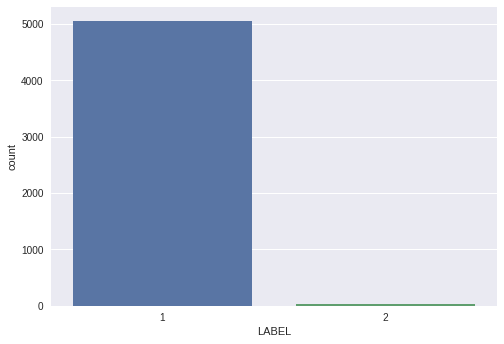

In [ ]:
# dealing with a highly imbalanced dataset
ax = sns.countplot(y, label = 'Count')
NonExo, Exo = y.value_counts()

print("In this exoTrain, stars that have exoplanets are:", Exo )

data inbalance is stark. **here accuracy can be misleading.**

In [ ]:
#  Hence, only 37 stars with exoplanets. The rest (5050!) are non-exoplanet stars.

In [ ]:
X.describe()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,1.410852e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,1.942289e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,-2.223300e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,-2.797500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,-9.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,2.874500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,1.263870e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


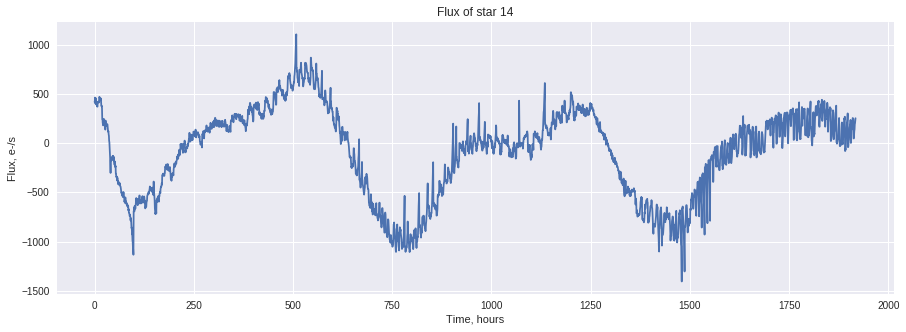

In [ ]:
for i in [13]:
    flux = exoTrain[exoTrain.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('Flux of star {}'.format(i+1))
    plt.ylabel('Flux, e-/s')
    plt.xlabel('Time, hours')
    plt.plot(time, flux)

# Pre-processing phase
We are detrending our time series data to see subtrends and remove distrotions.Also, we have normalized the data and removed outliers.

In [ ]:
from scipy import ndimage

In [ ]:
def detrender_normalizer(X):
    flux1 = X
    flux2 = ndimage.filters.gaussian_filter(flux1, sigma=10)
    flux3 = flux1 - flux2
    flux3normalized = (flux3-np.mean(flux3)) / (np.max(flux3)-np.min(flux3))
    return flux3normalized

In [ ]:
def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
       # print(sorted_values[:30])
        for j in range(remove):
            idx = sorted_values.index[j]
            #print(idx)
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            #print(idx,idx_num)
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX.'+str(idx2)] # corrected from 'FLUX-' to 'FLUX.'
                
                count += 1
            new_val /= count # count will always be positive here
            #print(new_val)
            if new_val < values[idx]: # just in case there's a few persistently high adjacent values
                df.set_value(i,idx,new_val)
        
            
    return df

In [ ]:
exoTrain.iloc[:,1:] = exoTrain.iloc[:,1:].apply(detrender_normalizer,axis=1) #detrending + normalizing both test and train data
exoTest.iloc[:,1:] = exoTest.iloc[:,1:].apply(detrender_normalizer,axis=1)

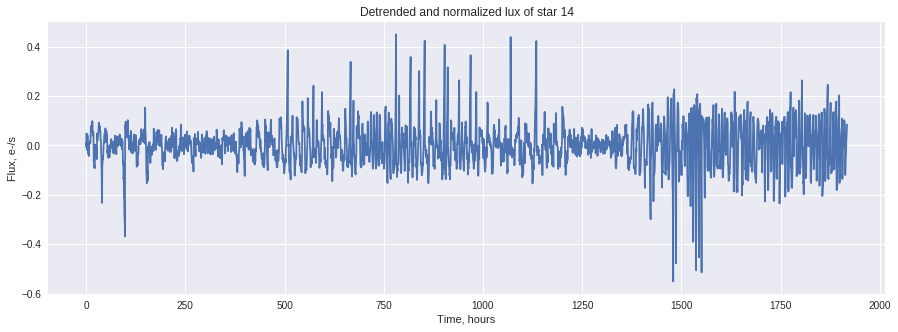

In [ ]:
for i in [13]: #detrended and normalized flux signal of the same star as above.
    flux = exoTrain[exoTrain.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('Detrended and normalized lux of star {}'.format(i+1))
    plt.ylabel('Flux, e-/s')
    plt.xlabel('Time, hours')
    plt.plot(time, flux)

In [ ]:
exoTrain.iloc[:,1:] = reduce_upper_outliers(exoTrain.iloc[:,1:]) #reducing upper outliers of both test and train data
exoTest.iloc[:,1:] = reduce_upper_outliers(exoTest.iloc[:,1:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


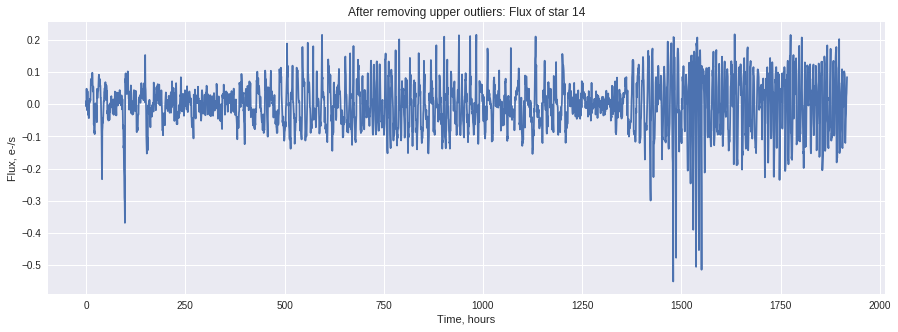

In [ ]:
for i in [13]: #after removing outlier of the flux signal of the same star as above.
    flux = exoTrain[exoTrain.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('After removing upper outliers: Flux of star {}'.format(i+1))
    plt.ylabel('Flux, e-/s')
    plt.xlabel('Time, hours')
    plt.plot(time, flux)

In [ ]:
#We're done with our pre-processing!

# Feature Extraction

Using FFTs and Normalization to extract features

In [ ]:
############################################################

In [ ]:
#Time to extract features. We're gonna observe frequencies from this flux signal. That is done by FFT.
#Gonna make a function for it.

In [ ]:
import scipy

In [ ]:
def spectrum_getter(X):
    Spectrum = scipy.fft(X, n=X.size)
    return np.abs(Spectrum)

In [ ]:
X = exoTrain.drop('LABEL', axis=1)
y_train = exoTrain.LABEL

X_test = exoTest.drop('LABEL', axis=1)#counterpart to our x, which is basically xTrain.
y_test = exoTest.LABEL #counterpart to y, which is basically yTrain.

In [ ]:
new_X_train = X.apply(spectrum_getter,axis=1)
new_X_test = X_test.apply(spectrum_getter,axis=1)

In [ ]:
y = y_train
X = new_X_train

y_final_test = y_test
X_final_test = new_X_test

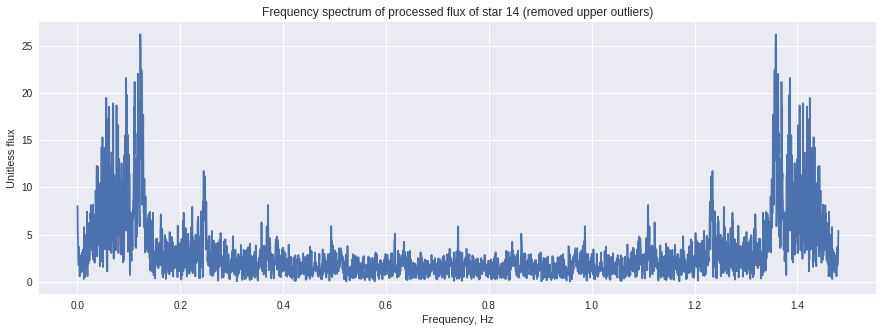

In [ ]:
df = X.join(y)
spec1 = df[df.LABEL == 2].drop('LABEL', axis=1).iloc[13,:]
freq = np.arange(len(spec1)) * (1/(36.0*60.0)) # Sampling frequency is 1 frame per ~36 minutes, or about 0.00046 Hz
plt.figure(figsize=(15,5))
plt.title('Frequency spectrum of processed flux of star {} (removed upper outliers)'
          .format(i+1))
plt.ylabel('Unitless flux')
plt.xlabel('Frequency, Hz')
plt.plot(freq, spec1)

In [ ]:
X.columns #although our columns represent frequencies now, they're still named fluxes.

Index(['FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6', 'FLUX.7',
       'FLUX.8', 'FLUX.9', 'FLUX.10',
       ...
       'FLUX.3188', 'FLUX.3189', 'FLUX.3190', 'FLUX.3191', 'FLUX.3192',
       'FLUX.3193', 'FLUX.3194', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197'],
      dtype='object', length=3197)

In [ ]:
#Let's normalize our spectra now.

In [ ]:

from  sklearn.preprocessing import normalize

In [ ]:
X = pd.DataFrame(normalize(X))
X_final_test = pd.DataFrame(normalize(X_final_test))

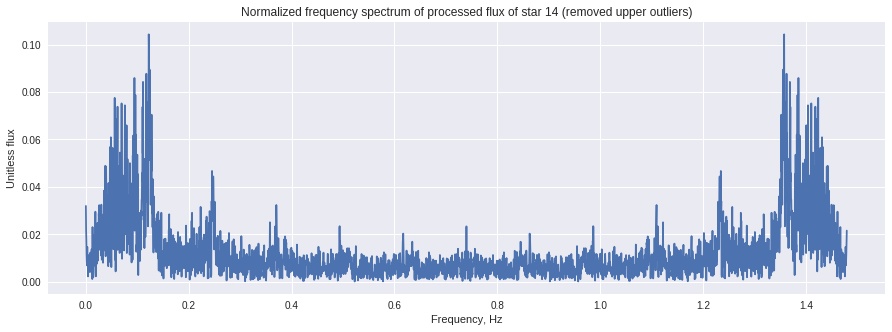

In [ ]:
# Frequency spectrum of star 20. Normalized and halved.
df = X.join(y)
for i in [13]:
    spec1 = df[df.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
    freq = np.arange(len(spec1)) * (1/(36.0*60.0)) # Sampling frequency is 1 frame per ~36 minutes, or about 0.00046 Hz
    plt.figure(figsize=(15,5))
    plt.title('Normalized frequency spectrum of processed flux of star {} (removed upper outliers)'
              .format(i+1))
    plt.ylabel('Unitless flux')
    plt.xlabel('Frequency, Hz')
    plt.plot(freq, spec1)

In [ ]:
#Since frequency spectra are symmetric, we need to remove half of all spectra:

X = X.iloc[:,:(X.shape[1]//2)]
X_final_test = new_X_test.iloc[:,:(new_X_test.shape[1]//2)]

In [ ]:
#####################################################################

# Classification of Unbalanced Data
Balancing Data using SMOTE, then using Linear SVC to classify

SMOTE : Synthetic Minority Oversampling Technique 

Below images are only for illustration purpose of how SMOTE works.
![alt text](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_1.png)




![alt text](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png)

SMOTE() takes four arguments:


*   X = the feature values (e.g. sepal length and width)
*   target = the class labels belonging to those feature values


*   K = how many of the closest neighbours are considered for synthesis

*  dup_size = how many times existing data points get reused for synthesis (zero is a special case leading to balanced classes)







![alt text](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_5.png)

![alt text](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_6.png)

In [ ]:
#         Now, we address the problem of our data being imbalanced. We combat this by oversampling, and the technique we use is  

In [ ]:
# ........*SMOTE* ----- Synthetic Minority Oversampling Technique. Challenges overfitting. 

In [ ]:
!pip install -q imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits)

In [ ]:
from sklearn.svm import LinearSVC #we'll get our classifier from here.



*   Accuracy: It is the ratio of number of correct predictions to the total number of input samples.
It works well only if there are equal number of samples belonging to each class.

*   Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

*   Recall:  the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

*   F1- score: the weighted average of precision and recall.






In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
SMOTE_accuracies = []
SMOTE_precisions = []
SMOTE_recalls    = []
SMOTE_f1s        = []

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]    
        df_train    = X_train.join(y_train)
        df_planet   = df_train[df_train.LABEL == 2].reset_index(drop=True)
        df_noplanet = df_train[df_train.LABEL == 1].reset_index(drop=True)
         #Simply splitted the dataset.               
    
        sm = SMOTE(ratio = 1.0) #Using smote for over-sampling.
        X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
        
        model = LinearSVC()
        est_sm = model.fit(X_train_sm, y_train_sm)
        y_test_pred = est_sm.predict(X_test)
        
        SMOTE_accuracies.append(accuracy_score(y_test, y_test_pred))
        SMOTE_precisions.append(precision_score(y_test, y_test_pred, pos_label=2))
        SMOTE_recalls.append(recall_score(y_test, y_test_pred, pos_label=2))
        SMOTE_f1s.append(f1_score(y_test, y_test_pred, pos_label=2))
        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py

In [ ]:
print("Average Accuracy:\t", "{:0.10f}".format(np.mean(SMOTE_accuracies)))
print("Average Precision:\t","{:0.10f}".format(np.mean(SMOTE_precisions)))
print("Average Recall:\t\t", "{:0.10f}".format(np.mean(SMOTE_recalls)))
print("Average F1:\t\t", "{:0.10f}".format(np.mean(SMOTE_f1s)))

Average Accuracy:	 0.9972475751
Average Precision:	 0.9416666667
Average Recall:		 0.6666666667
Average F1:		 0.7621428571
